## Data analysis with Premier League data

### Useful libraries

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pylab as plt
import numpy as np

## Linear Regressinon with sklearn

In [2]:
from sklearn.linear_model import LinearRegression

## Importation of the dataset as a pandas dataframe

In [4]:
df = pd.read_csv('Premier League Player Stats.csv',index_col='Rank')
df.head()

,PLAYER,TEAM,GAMES PLAYED,GAMES STARTED,MINUTES PLAYED,GOALS,ASSISTS,SHOTS,SHOTS ON GOAL
Rank,,,,,,,,,
1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43
2,Danny Ings,Southampton,38,32,2812,22,2,66,38
3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42
4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38
5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59


## Filtering players who have scored less than one goal or one assist and less than 10 shots

In [8]:
df = df[(df['SHOTS'] > 10) & ((df['ASSISTS'] > 0) | (df['GOALS'] > 0))]

In [9]:
shots_df = np.asarray(df[['GOALS','SHOTS ON GOAL','SHOTS']])
shots_labels = np.asarray(['GOALS','SHOTS ON GOAL','SHOTS'])
shots_df = shots_df.transpose()

## Statistical infos for numerical values

In [10]:
df.describe()

,GAMES PLAYED,GAMES STARTED,MINUTES PLAYED,GOALS,ASSISTS,SHOTS,SHOTS ON GOAL
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,29.538071,23.883249,2129.253807,4.517766,2.700508,28.538071,14.177665
std,6.718450,9.273705,790.041782,4.738675,2.751002,17.936248,11.054314
min,10.000000,1.000000,226.000000,0.000000,0.000000,11.000000,1.000000
25%,25.000000,17.000000,1505.000000,1.000000,1.000000,15.000000,6.000000
50%,31.000000,26.000000,2247.000000,3.000000,2.000000,22.000000,10.000000
75%,35.000000,31.000000,2766.000000,6.000000,4.000000,36.000000,19.000000
max,38.000000,38.000000,3420.000000,23.000000,20.000000,95.000000,59.000000


## Definition of a scatter function using the Plotly module to reduce code redundancy

In [11]:
def plotlyScatter(data,xAxis,yAxis,labelAxis,title):
    fig = px.scatter(data, x=xAxis, y=yAxis, text=labelAxis, log_x=True, size_max=80)

    fig.update_traces(textposition='top center')

    fig.update_layout(
        height=800,
        title_text = title
    )

    fig.show()

## Scatter of shots and goals to observe who are the best goalscorers

In [12]:
plotlyScatter(df,'SHOTS','GOALS','PLAYER','Scatter of shots and goals')

## Scatter of shots on goal and goals to observe who are the most efficient players

In [12]:
plotlyScatter(df,'SHOTS ON GOAL','GOALS','PLAYER','Scatter of shots on goal and goals')

## Scatter of goals to observe the correlation between the number of minutes played and the number of goals scored

In [13]:
plotlyScatter(df,df['MINUTES PLAYED'],df['GOALS'],df['PLAYER'],'Scatter of goals and minutes played')

## Number of matchs column added based on the number of minutes played

In [13]:
df['NUMBER OF MATCHS EQUIVALENT'] = df['MINUTES PLAYED'] // 90
df.head()

,PLAYER,TEAM,GAMES PLAYED,GAMES STARTED,MINUTES PLAYED,GOALS,ASSISTS,SHOTS,SHOTS ON GOAL,NUMBER OF MATCHS EQUIVALENT
Rank,,,,,,,,,,
1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43,33
2,Danny Ings,Southampton,38,32,2812,22,2,66,38,31
3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42,34
4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38,29
5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59,32


## Linear Regression of the shots and shots on goal columns 

In [14]:
X = df.iloc[:, df.columns.get_loc('SHOTS')].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df.iloc[:, df.columns.get_loc('SHOTS ON GOAL')].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

## Linear regression of the shots and the shots on goal to observe if most shots are on target

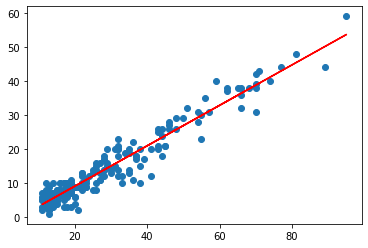

In [15]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

## Box plots

### Box plot of shots and shots on goal

In [16]:
px.box(df[['SHOTS','SHOTS ON GOAL','PLAYER']],notched=True,title="Box plot of shots and shots on goal",hover_data=["PLAYER"])

In [17]:
px.box(df[['GOALS','PLAYER']],hover_data=["PLAYER"])

## To dowload the modified DataFrame into a new CSV file

In [20]:
df.to_csv('PlDataAnalysed.csv')

## List of the bottom five players in the top 3 teams

In [18]:
df.loc[df['TEAM'].isin(['Liverpool','Manchester City','Manchester United'])].tail()

,PLAYER,TEAM,GAMES PLAYED,GAMES STARTED,MINUTES PLAYED,GOALS,ASSISTS,SHOTS,SHOTS ON GOAL,NUMBER OF MATCHS EQUIVALENT
Rank,,,,,,,,,,
216,Jesse Lingard,Manchester United,22,9,932,1,0,12,6,10
217,Andreas Hugo Hoelgebaum Pereira,Manchester United,25,18,1488,1,3,28,14,16
218,Paul Pogba,Manchester United,16,13,1205,1,3,17,8,13
224,Harry Maguire,Manchester United,38,38,3420,1,1,25,8,38
390,Fernando Luiz Rosa,Manchester City,30,26,2399,0,1,13,2,26


## List of the top five players in the top 3 teams

In [19]:
df.loc[df['TEAM'].isin(['Liverpool','Manchester City','Manchester United'])].head()

,PLAYER,TEAM,GAMES PLAYED,GAMES STARTED,MINUTES PLAYED,GOALS,ASSISTS,SHOTS,SHOTS ON GOAL,NUMBER OF MATCHS EQUIVALENT
Rank,,,,,,,,,,
4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38,29
5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59,32
6,Sadio Mané,Liverpool,35,31,2753,18,7,66,36,30
9,Marcus Rashford,Manchester United,31,31,2653,17,7,77,44,29
10,Anthony Martial,Manchester United,32,31,2638,17,6,59,40,29
